In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
%matplotlib inline
sns.set(style='ticks', palette='Set2')

In [37]:

def bayes(n_params=100, n_sample=500, true_p=.8, prior_p=.75, n_prior=100):
    params = np.linspace(0, 1, n_params)
    sample = np.random.binomial(n=1, p=true_p, size=n_sample)
    # likelhood follows a normal pdf
    likelihood = np.array([np.product(st.norm.pdf(sample, p)) for p in params])
    #likelihood = likelihood / np.sum(likelihood)
    prior_sample = np.random.binomial(n=1, p=prior_p, size=n_prior)
    prior = np.array([np.product(st.norm.pdf(prior_sample, p)) for p in params])
    prior = prior / np.sum(prior)
    posterior = [prior[i] * likelihood[i] for i in range(prior.shape[0])]
    posterior = posterior / np.sum(posterior)
     
    fig, axes = plt.subplots(3, 1, sharex=True, figsize=(8,8))
    axes[0].plot(params, likelihood)
    axes[0].set_title("Likelihood Distribution")
    axes[1].plot(params, prior)
    axes[1].set_title("Prior Distribution")
    axes[2].plot(params, posterior)
    axes[2].set_title("Posterior Distribution")
    sns.despine()
    plt.tight_layout()

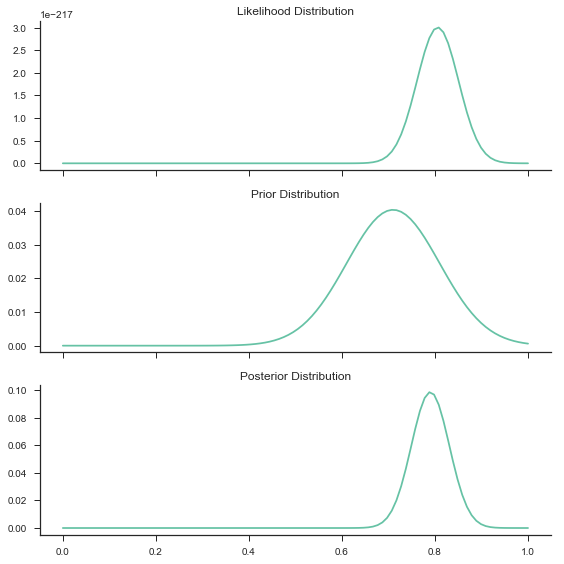

In [38]:
example_post = bayes()

You will notice that I set 100 as the number of observations for the prior and likelihood. This increases the variance of our distributions. More data typically decreases the spread of a distribution. Also, as you get more data to estimate your likelihood, the prior distribution matters less and less.

Lets try changing both the sample size and priors to observe this. 

But this is not a complete truism. It is not that easy. Information in your data overwhelms prior information not only your sample size is large, but when your data provides enough information to overwhelm the prior information. Uninformative priors get easily persuaded by data, while strongly informative ones may be more resistant.